# Time Series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import numpy as np

loading and viewing data

In [2]:
temp_df = pd.read_csv("C:\my files\DailyDelhiClimateTrain.csv")

In [3]:
temp_df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


setting date as index

In [6]:
#checking for nulls in date column
print(temp_df[temp_df["date"].isna()])

Empty DataFrame
Columns: [date, meantemp, humidity, wind_speed, meanpressure]
Index: []


In [7]:
#convert object into date datatype
temp_df["date"] = pd.to_datetime(temp_df["date"],errors="coerce")
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [8]:
#setting index
temp_df.set_index("date",inplace = True)
temp_df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


visualise

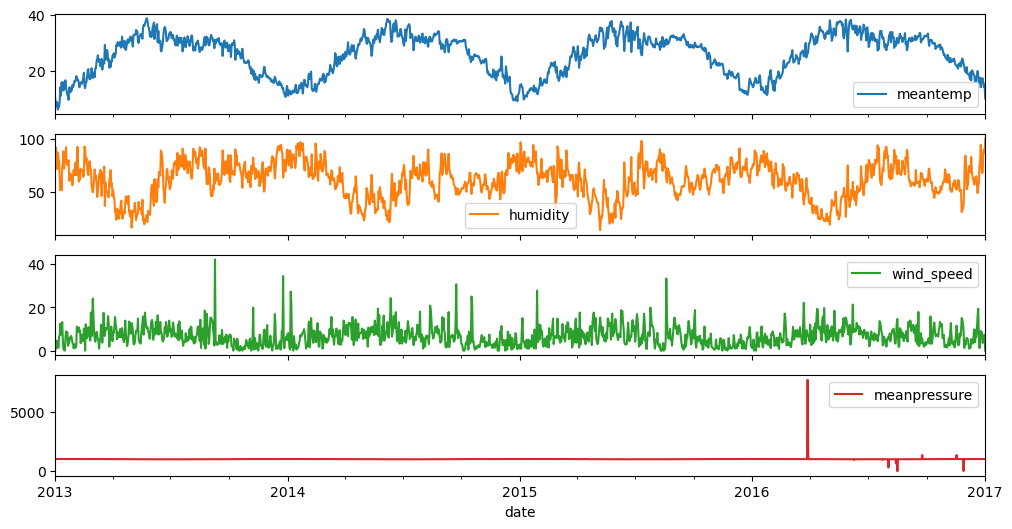

In [10]:
temp_df.plot(figsize=(12,6),subplots = True)
plt.show()

conclusion:
1) meantemp - every year it goes on increases and decreases
            - when ever the humidity is high the meantemp decreses
2) humidity - humidity varies slighty
3) wind_speed - it is high btw 2013 and 2014
              - it is normal in 2016 to 2017
4) meanpressure - it maintance same range up to 2016 from 2013
                - it is high in 2016 to 2017

# stationarity
A time series is stationary if its statistical properties(men,variance,autocorrelation)remain constant over time

In [ ]:
hypotheses of the ADF Test
- Null Hypothesis:The time series has a unit root (non - stationary)
- Alternative Hypothesis:The time serie does not have a unit root(stationary)

In [11]:
adfuller_result = adfuller(temp_df["meantemp"])
print(adfuller_result)

(-2.0210690559206728, 0.27741213723016056, 10, 1451, {'1%': -3.4348647527922824, '5%': -2.863533960720434, '10%': -2.567831568508802}, 5423.895746470953)


In [12]:
if adfuller_result[1]<0.05:
    print("Stationary")
else:
    print("Non - Stationary")

Non - Stationary


# Differencing to Remove Trend 
- Differencing is a technique used to make a non-stationary time series stationary by remving trends or seasonality.it involves subtracting the preious observation from the current observation
- temp =[20,21,22,24,25,27,28,27]
- diff =[1,1,2,1,2,1,-1]
- the new series fluctuates around zero -2 to 2

In [13]:
temp_df['meantemp_diff'] = temp_df["meantemp"].diff()
temp_df.head()

,meantemp,humidity,wind_speed,meanpressure,meantemp_diff
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,-2.600000
2013-01-03,7.166667,87.000000,4.633333,1018.666667,-0.233333
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1.500000
2013-01-05,6.000000,86.833333,3.700000,1016.500000,-2.666667


In [14]:
adfuller_resul_afterdiff = adfuller(temp_df["meantemp_diff"].dropna())
if adfuller_result[1]>0.05:
    print("Stationary")
else:
    print("Non - Stationary")

Stationary


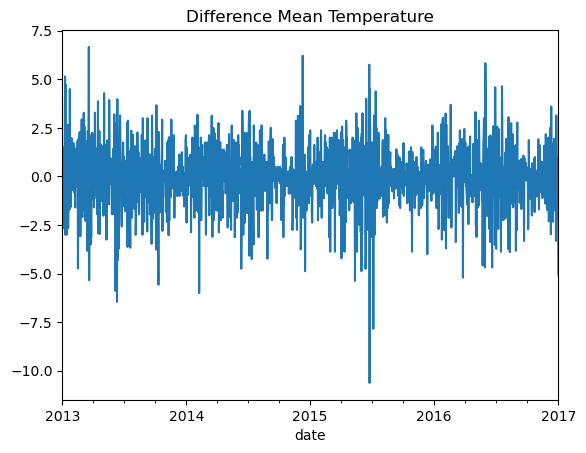

In [15]:
temp_df["meantemp_diff"].plot(title = "Difference Mean Temperature")
plt.show()

concusion:
1) The data shows variation in temperature between -10 and 7.5 with a mean of 0
2) there is no long difference in trends but frequent peaks shows low spikes in 2015-2016.
3) there is outliers
4) the mean temperature is now stationary

# use seasonal decomposition to analyze trend,seasonality,and residuals

- Trend : The long term pattern(increase or decrease over time)
- seasonality : The repeating patterns at fixed intervals(monthly sales spikes)
- Residual(Noise) : The random variations that are not explaines by trend or seasonality
- interpreting the Output:
- original series : The raw time series data
- trend  component : The general direction of the data over time
- seasonal component : The repeating patterns(eg:higher sales in december)
- Residual component : The remaining part after removing trend and seasonally

In [19]:
decomposing = seasonal_decompose(temp_df["meantemp"],model = "additive",period = 365)

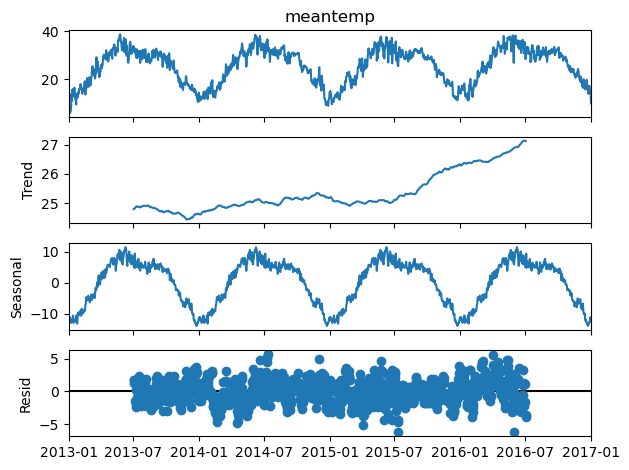

In [21]:
decomposing.plot()
plt.show()

conculsion:
1) there is a rapid increase in trend between 7/2015 to 7/2016
2) it exhibits a clear seasonal pattern,with same fluctuations repeating over time
3) the residuals is randomly distributed 

# ARIMA

In [24]:
# splitting data
len(temp_df)

1462

In [25]:
print(len(temp_df)*0.8)

1169.6000000000001


In [29]:
train = temp_df.iloc[0:1169]
test = temp_df.iloc[1169:]
len(test)

293

In [27]:
mymodel = ARIMA(train["meantemp"],order=(1,1,1))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [28]:
mymodel = mymodel.fit()

In [34]:
forecast = mymodel.forecast(steps = len(test))
print(forecast.head())

2016-03-15    22.826205
2016-03-16    23.085687
2016-03-17    23.234913
2016-03-18    23.320731
2016-03-19    23.370084
Freq: D, Name: predicted_mean, dtype: float64


In [37]:
test["forecaste"] = forecast
test.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9892\3744547450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["forecaste"] = forecast


,meantemp,humidity,wind_speed,meanpressure,meantemp_diff,forecaste
date,,,,,,
2016-03-15,24.066667,58.933333,8.646667,1014.866667,1.691667,22.826205
2016-03-16,23.937500,53.750000,10.881250,1012.812500,-0.129167,23.085687
2016-03-17,26.312500,50.312500,6.843750,1010.437500,2.375000,23.234913
2016-03-18,26.187500,61.250000,6.712500,1009.812500,-0.125000,23.320731
2016-03-19,26.785714,61.857143,3.578571,1009.214286,0.598214,23.370084


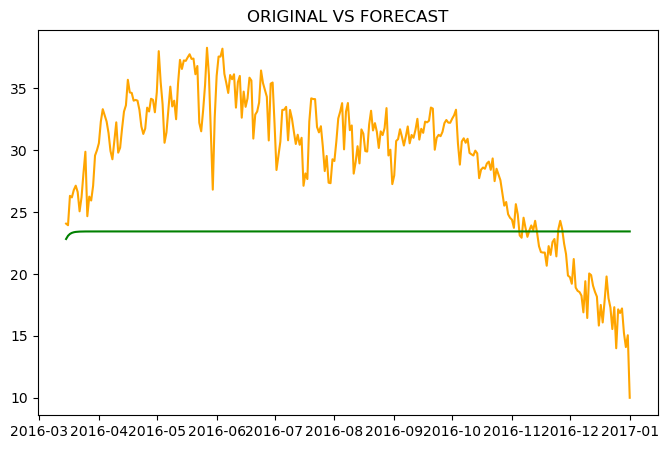

In [40]:
plt.figure(figsize=(8,5))
plt.plot(test.index,test["meantemp"],color="orange",label="Original")
plt.plot(test.index,test["forecaste"],color="green",label="Forecast")
plt.title("ORIGINAL VS FORECAST")
plt.show()

In [70]:
len(temp_df)

1462

In [71]:
print(len(temp_df)*0.8)

1169.6000000000001


In [72]:
train1 = temp_df.iloc[0:1169]
test1 = temp_df.iloc[1169:]
len(test1)

293

In [65]:
mymodel = ARIMA(train["meantemp_diff"],order=(1,1,1))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [66]:
mymodel = mymodel.fit()

In [67]:
forecast = mymodel.forecast(steps = len(test))
print(forecast.head())

2016-03-15    0.322914
2016-03-16   -0.040400
2016-03-17    0.019656
2016-03-18    0.009729
2016-03-19    0.011370
Freq: D, Name: predicted_mean, dtype: float64


In [73]:
test1["forecaste_diff"] = forecast
test1.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9892\990163927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1["forecaste_diff"] = forecast


,meantemp,humidity,wind_speed,meanpressure,meantemp_diff,forecaste_diff
date,,,,,,
2016-03-15,24.066667,58.933333,8.646667,1014.866667,1.691667,0.322914
2016-03-16,23.937500,53.750000,10.881250,1012.812500,-0.129167,-0.040400
2016-03-17,26.312500,50.312500,6.843750,1010.437500,2.375000,0.019656
2016-03-18,26.187500,61.250000,6.712500,1009.812500,-0.125000,0.009729
2016-03-19,26.785714,61.857143,3.578571,1009.214286,0.598214,0.011370


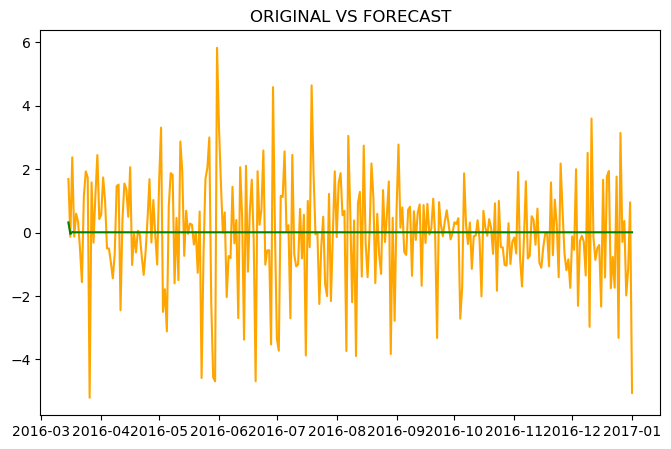

In [74]:
plt.figure(figsize=(8,5))
plt.plot(test.index,test["meantemp_diff"],color="orange",label="Original")
plt.plot(test.index,test["forecaste_diff"],color="green",label="Forecast")
plt.title("ORIGINAL VS FORECAST")
plt.show()

conculsion:
1) 15th mar,original value = 24.066667 , model says there is -0.040400 change on next day 24.066667-0.040400 = 24.10(predict) and 23.937(original)